<a href="https://colab.research.google.com/github/Alejandro-A-DS/Reconocimiento_numeros_escritos_a_mano/blob/main/M6_AI3_AlvaradoSergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.3 Reconocimiento de Números Escritos a Mano
---

MNIST es un conjunto de datos de imágenes de dígitos escritos a mano que se utiliza ampliamente en el campo de la visión por computadora y el aprendizaje automático. El nombre MNIST significa "Modified National Institute of Standards and Technology", y el conjunto de datos se compone de imágenes de 70,000 dígitos escritos a mano (0-9), cada una de ellas de 28x28 píxeles en escala de grises.

El conjunto de datos está dividido en dos partes: un conjunto de entrenamiento de 60,000 imágenes y un conjunto de prueba de 10,000 imágenes. Este conjunto de datos se ha utilizado durante muchos años como un estándar para comparar algoritmos y modelos de aprendizaje automático, y ha permitido a los investigadores realizar avances significativos en la clasificación de imágenes y el reconocimiento de patrones.

**Se pide:** Aplicar el algoritmo AdaBoost para identificar el dígito en la imagen.

**Se espera del alumno:**

1. Preprocesado:
- Transformar el conjunto de datos para agrupar las dos dimensiones (28x28) que definen las imágenes en una dimensión que permita a los algoritmos de aprendizaje aprender un modelo.
2. Explorar visualmente el conjunto de datos.
3. Generar un modelo con el algoritmo AdaBoost.
4. Evaluación del modelo.
5. Optimización del modelo mediante búsqueda de parámetros.

Consideraciones:

- Los resultados de los modelos pueden ser dispares dependiendo de diversos factores. No hay un modelo único correcto.
- En cuanto al algoritmo, se pide que se prueben diferentes parametrizaciones buscando un modelo que generalice correctamente (tratar de evitar sobreajuste y subajueste).
- Se valorará tanto la corrección de las respuestas como su presentación.

Para resolver la actividad, os recomendamos utilizar el dataset MNIST de Tensorflow.

In [ ]:
# Importación de las librerías a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 110

In [ ]:
# Importación del conjunto de datos a trabajar

from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de x_test:", x_test.shape)
print("Forma de y_test:", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Forma de y_test: (10000,)


### 6.3.1 Preprocesado
---

Lo primero que se debe observar es que `x_train` y `x_test` son tensores de 3 dimensiones, los cuales deben transformarse en una matriz bidimensional para ser utilizados en un modelo de Machine Learning. A continuación se crearán  dos matrices (train y test) las cuales conservarán la información tanto de `x_train` como de `x_test` cambiando únicamente su distribución de la sigiuente manera:

- El número de filas segurá siendo la cantidad de observaciones en cada uno de los tensores originales.
- El número de columnas será el total de pixeles contenidos en cada una de las observaciones, es decir cada observación tiene 28x28 pixeles, lo cual resultaría en un total de 28x28 = 784 columnas.

In [ ]:
# Creación de las matrices bidimensionales

X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

print(f"Dimensiones de la matriz de entrenamiento: {X_train.shape}")
print(f"Dimensiones de la matriz de prueba: {X_test.shape}")

Dimensiones de la matriz de entrenamiento: (60000, 784)
Dimensiones de la matriz de prueba: (10000, 784)


## 6.3.2 Explorar visualmente el conjunto de datos
---
Si deseamos ver el conjunto de datos, la mejor forma es a través de su representación grafica, ya que si miramos los datos descargados directamente de Tensorflow difícilmente podremos entender algo:


In [ ]:
# Primera observación del dataset de entrenamiento

X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# Primer etiqueda de entrenamiento

y_train[0]

5

Como podemos observar, la primera observación de la matriz de entrenamiento no nos proporciona más información que la intensidad de la escala de grises para cada uno de los pixeles que componen la imagen. Por eso se visualizarán al menos las 5 primeras observaciones de la matriz de entrenamiento con sus respectivas etiquetas:

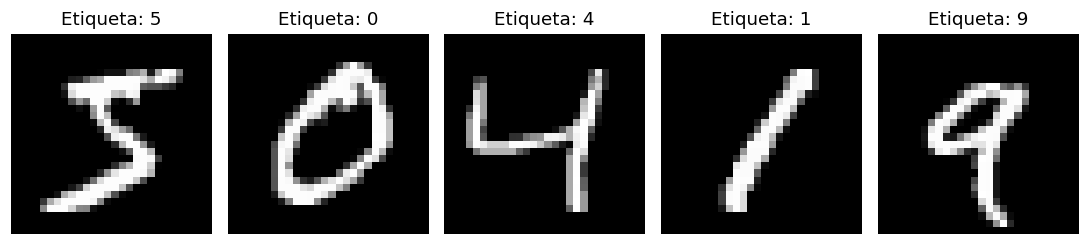

In [ ]:
# Visualización de las primeras observaciones (para legibilidad humana)

fig, axs = plt.subplots(1,5, figsize=(10, 4))

for i in range(5):
    img = x_train[i]
    label = y_train[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Etiqueta: {label}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Teniendo cuenta que nuestro objetivo es idenfiticar la etiqueda (dígito) de cada observación podemos observar que estamos frente a un problema de clasificación.

In [ ]:
# Probabilidad de obtener cada valor de forma aleatoria en entrenamiento

pd.Series(y_train).value_counts() / x_train.shape[0]

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64

In [ ]:
# Probabilidad de obtener cada valor de forma aleatoria en prueba

pd.Series(y_test).value_counts()/ x_test.shape[0]

1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
dtype: float64

## 6.3.3 Generar un modelo con el algoritmo AdaBoost.
---
Una vez tenemos las matrices de entrenamiento y prueba listas podemos proceder a la generación del modelo con AdaBoost. Dada la naturaleza del problema, necesitamos crear un clasificador que distinga los número del 0 al 9. Inicialmente se generará el modelo con los valores por defecto que tiene `scikit-learn` para `adaboost`, el estimador será `DecisionTreeClassifier` con una profundidad máxima de 1, número de estimadores será 50, `learning_rate` será 1 y un `random_state` igual a 7 sencillamente para reproducibilidad de los resultados.

In [ ]:
# Generación del modelo AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=7)
ada_model.fit(X_train, y_train)

pred_train = ada_model.predict(X_train)
pred_test = ada_model.predict(X_test)

## 6.3.4 Evaluación del modelo.
---
A continuación se realizará la evaluación del primer modelo clasificador a partir de la precisión y evaluación por costes (matriz de confusión).

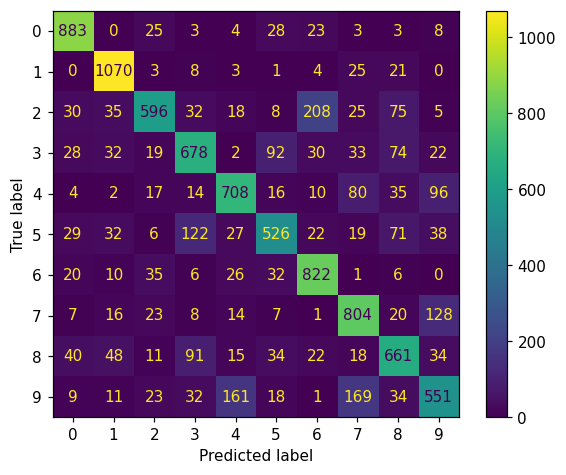

In [ ]:
# Matriz de confusión multiclase

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Presición del modelo (número total de aciertos)

print(f"Precisión sobre los datos de entrenamiento: {round(100.0*ada_model.score(X_train, y_train), 2)}%")
print(f"Precisión sobre los datos de test: {round(100.0*ada_model.score(X_test, y_test), 2)}%")

Precisión sobre los datos de entrenamiento: 72.84%
Precisión sobre los datos de test: 72.99%


Antes de tan siquiera modificar los parámetros del modelo, es importante resaltar los resultados obtenidos hasta el momento. Es sorprendente que el algoritmo haya obtenido una precisión de aproximadamente 73% tanto en entrenamiento como en prueba, es un valor bastante elevado considerando que son 10 clases diferentes (dígitos del 0 al 9) y que la probabilidad de acertar aleatoriamente a cada clase está entre el 8% y el 11%, lo que significa que el modelo está muy por encima de la predicción aleatoria de valores. En este caso particular no es necesario tener en cuenta las predicciones incorrectas (es decir que es indiferente si el modelo predijo incorrectamente un 3 como un 5 o 9). Ahora lo ideal es ajustar los parámetros tratando de aumentar la precisión del modelo.

## 6.3.5 Optimización del modelo mediante búsqueda de parámetros.
---
En esta parte de conservaremos como estimador el DecisionTreeClassifier de profundidad 1, los parámetros que se modificarán son el learning rate (desde 0.1 a 2.2) y el número de estimadores (Desde 1 hasta 100 en intervalos de 10).

In [ ]:
# Celda para encontrar parámetros que mejoren el rendimiento

precision_train = []
precision_test = []
n_estimators = []
learning_rate = []

for i in range(50, 151, 10): # Número de estimadores
  for j in np.arange(0.1, 1.0, 0.2): # Learning rate

    ada_model_op = AdaBoostClassifier(n_estimators = i,
                                      learning_rate = j,
                                      random_state = 7)

    ada_model_op.fit(X_train, y_train)

    y_pred_train = ada_model_op.predict(X_train)
    y_pred_test = ada_model_op.predict(X_test)

    n_estimators.append(i)
    learning_rate.append(j)
    precision_train.append(ada_model_op.score(X_train, y_train))
    precision_test.append(ada_model_op.score(X_test, y_test))


df_resultados = pd.DataFrame({"N_estimadores": n_estimators,
                              "Learning_rate": learning_rate,
                              "Precision_train": precision_train,
                              "Precision_test": precision_test})

In [ ]:
# Learning Rate y número de estimadores que generan la mayor precisión en test

df_resultados.loc[df_resultados['Precision_test'] == df_resultados['Precision_test'].max()]

In [ ]:
# Modelo con mejores parámetros

ada_model_op = AdaBoostClassifier(random_state = 7,
                                  learning_rate = 0.3,
                                  n_estimators = 100)

ada_model_op.fit(X_train, y_train)

pred_train_op = ada_model_op.predict(X_train)
pred_test_op = ada_model_op.predict(X_test)

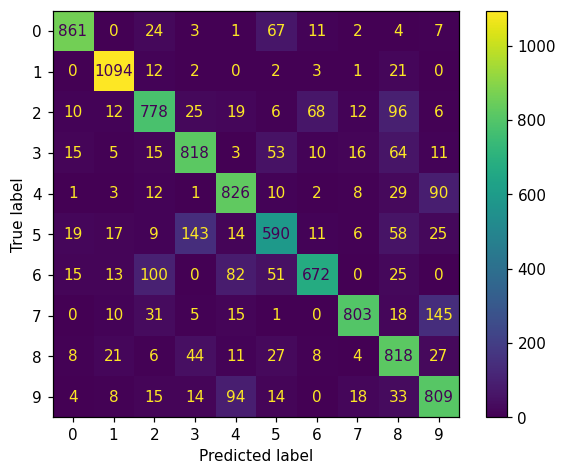

In [ ]:
# Matriz de confusión del modelo optimizado

cm_op = confusion_matrix(y_test, pred_test_op)
ConfusionMatrixDisplay(confusion_matrix=cm_op).plot();

In [ ]:
# Presición del modelo optimizado

print(f"Precisión sobre los datos de entrenamiento: {round(100.0*ada_model_op.score(X_train, y_train), 2)}%")
print(f"Precisión sobre los datos de test: {round(100.0*ada_model_op.score(X_test, y_test), 2)}%")

Precisión sobre los datos de entrenamiento: 80.13%
Precisión sobre los datos de test: 80.69%


Habiendo hecho una iteración de los parámetros `learning_rate` y `n_estimators` se logra obtener un mejor resultado aún, más de 80% de precisión en prueba, son resultados muy positivos dado a que, como se mencionó anteriormente, los resultados son mucho mejores que un clasificador aleatorio. Sin embargo, el coste computacional para obtener mejores parámetros es muy elevado, ya que el tiempo de ejecución de las iteraciones fue cercano a 3 horas (por lo cual no se recomienda correr la celda de las iteraciones). Además esto también implica que podríamos haber dejado los mejores parámetros fuera del rango de nuestras iteraciones. Incluso quizá con otro estimador base (stump) se podría mejorar la clasificación del algoritmo.